# Sesion 18 - Actividad - Puntaje Reading 2

## Actividad Básica: Puntaje Reading 2

Crea / Presenta la forma que creas más conveniente para describir qué grado por escuela tuvo el mejor puntaje en "reading" y con ello saber que genero es el que predomina en este filtro.

### Librerias y Dataset

In [1]:
# Librerias
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Dataset
df = pd.read_csv('clean_students_complete.csv')
df.head()

,Unnamed: 0,Student ID,student_name,gender,grade,school_name,reading_score,math_score
0,0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,3,Richard Scott,M,12th,Huang High School,67,58
4,4,4,Bonnie Ray,F,9th,Huang High School,97,84


### Preprocesamiento y Limpieza del dataset

In [3]:
# limpieza del dataset
df = df.drop('Unnamed: 0', axis=1)

In [4]:
# Se elimina la columna que no se va a utilizar
df = df.set_index('Student ID')
df.head()

,student_name,gender,grade,school_name,reading_score,math_score
Student ID,,,,,,
0,Paul Bradley,M,9th,Huang High School,66,79
1,Victor Smith,M,12th,Huang High School,94,61
2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,Richard Scott,M,12th,Huang High School,67,58
4,Bonnie Ray,F,9th,Huang High School,97,84


In [5]:
# Se elimina la columna que no se necesita
df = df.drop('math_score', axis=1)
df.head()

,student_name,gender,grade,school_name,reading_score
Student ID,,,,,
0,Paul Bradley,M,9th,Huang High School,66
1,Victor Smith,M,12th,Huang High School,94
2,Kevin Rodriguez,M,12th,Huang High School,90
3,Richard Scott,M,12th,Huang High School,67
4,Bonnie Ray,F,9th,Huang High School,97


### Se agrupan los datos para tener la informacion por grado-escuela

In [6]:
# Se agrupan los datos por grado - escuela y , se calcula el promedio por grado 
# se resetea el index para usar las columnas como series
df_grade = df.groupby(['grade', 'school_name']).mean()
df_grade = df_grade.reset_index()

In [7]:
# Se despliega una muestra de la informacion
df_grade.head()

,grade,school_name,reading_score
0,10th,Bailey High School,80.907183
1,10th,Cabrera High School,84.253219
2,10th,Figueroa High School,81.408912
3,10th,Ford High School,81.262712
4,10th,Griffin High School,83.706897


In [8]:
# Se crea la lista de escuelas para iterar sobre ellas y calcular el grado con el promedio mas alto
escuelas = list(df_grade['school_name'].unique())
escuelas

['Bailey High School',
 'Cabrera High School',
 'Figueroa High School',
 'Ford High School',
 'Griffin High School',
 'Hernandez High School',
 'Holden High School',
 'Huang High School',
 'Johnson High School',
 'Pena High School',
 'Rodriguez High School',
 'Shelton High School',
 'Thomas High School',
 'Wilson High School',
 'Wright High School']

In [9]:
# Se crea una funcion que filtre de la escuela seleccionada el grado mas alto
# recibiendo el indice de la escuela proveniente de la lista de escuelas
def filtrado(indice):
    return df_grade[df_grade['school_name']==escuelas[indice]] \
            [df_grade[df_grade['school_name']==escuelas[indice]] \
            ['reading_score'] == df_grade[df_grade['school_name']==escuelas[indice]]['reading_score'].max()]

In [10]:
# Se crea un DataFrame para agrear el grado mas alto de cada escuela y poder graficarlo
df_mejores_escuelas = pd.DataFrame()

# Se itera sobre la lista de escuelas llenando el dataframe de mejores escuelas
for indice, escuela in enumerate(escuelas):
    # Se concatena cada grado de con promedio mas alto de cada escuela usando la funcion que las filtra
    df_mejores_escuelas = pd.concat([df_mejores_escuelas,filtrado(indice)])

In [11]:
# Se muestra el nuevo dataframe con los grados con mas alto promedio de cada escuela
df_mejores_escuelas

,grade,school_name,reading_score
45,9th,Bailey High School,81.303155
31,12th,Cabrera High School,84.287958
2,10th,Figueroa High School,81.408912
3,10th,Ford High School,81.262712
19,11th,Griffin High School,84.288089
20,11th,Hernandez High School,81.396140
36,12th,Holden High School,84.698795
7,10th,Huang High School,81.512386
53,9th,Johnson High School,81.260714
39,12th,Pena High School,84.591160


In [12]:
# Se crea una columna para usarla como eje x
df_mejores_escuelas['etiqueta'] = df_mejores_escuelas['grade'] + " " + df_mejores_escuelas['school_name']
df_mejores_escuelas

,grade,school_name,reading_score,etiqueta
45,9th,Bailey High School,81.303155,9th Bailey High School
31,12th,Cabrera High School,84.287958,12th Cabrera High School
2,10th,Figueroa High School,81.408912,10th Figueroa High School
3,10th,Ford High School,81.262712,10th Ford High School
19,11th,Griffin High School,84.288089,11th Griffin High School
20,11th,Hernandez High School,81.396140,11th Hernandez High School
36,12th,Holden High School,84.698795,12th Holden High School
7,10th,Huang High School,81.512386,10th Huang High School
53,9th,Johnson High School,81.260714,9th Johnson High School
39,12th,Pena High School,84.591160,12th Pena High School


Text(0, 0.5, 'Grado Promedio')

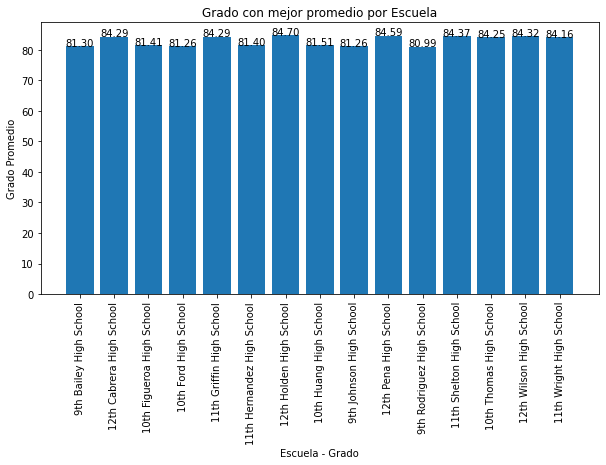

In [13]:
# Funcion para acomodar las labels

# Se definen las etiquetas
# Valores para las etiquetas
x = list(df_mejores_escuelas['etiqueta'])
y = list(df_mejores_escuelas['reading_score'])

# Se crean las etiquetas de datos para cada columna
def labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], str(format(y[i],".2f")), ha='center')

# Se despliega la grafica
plt.figure(figsize=(10,5))
plt.bar(x,y)
labels(x,y)
plt.title('Grado con mejor promedio por Escuela')
plt.xlabel('Escuela - Grado')
plt.xticks(rotation='vertical')
plt.ylabel('Grado Promedio')


## Actividad Avanzada: Puntaje Reading 2

Identifica a los alumnos con el mismo apellido que van en la misma escuela y evalúa las familias (misma escuela, mismo apellido) que tengan mejor puntaje en "reading". Presenta tus resultados de forma visual.